In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Connecting to sqlite database

In [2]:
con = sqlite3.connect('basketball.sqlite')

### Cursor for SQL queries

In [3]:
cur = con.cursor()

## Warriors at home (Oracle Arena) vs. Rest of League at home

In this notebook I compare the Warriors' performance at Oracle compared to how the rest of the league performed at their home arena. I look at their FG%, 3PT%, and Wins.

### Warrior home games

In [4]:
gsw_games = """SELECT 
                   team_abbreviation_home, 
                   season_id, 
                   fg_pct_home, 
                   fg3_pct_home, 
                   wl_home
               FROM 
                   game 
               WHERE 
                   team_abbreviation_home='GSW' 
                   AND 
                   season_id BETWEEN 22006 AND 22018"""

gsw_home_games = pd.read_sql(gsw_games, con)

In [5]:
#Puts seasons to be analyzed into list
gsw_seasons = gsw_home_games['SEASON_ID'].unique()

#Arrays for bar plots
gsw_fg_avg_home = []
gsw_3pt_avg_home = []
gsw_wins_home = []

for season in gsw_seasons:
    #Creates dataframe containing stats for one season
    df_temp = gsw_home_games[gsw_home_games['SEASON_ID'] == season]
    #Puts data into arrays
    gsw_fg_avg_home.append(df_temp['FG_PCT_HOME'].mean())
    gsw_3pt_avg_home.append(df_temp['FG3_PCT_HOME'].mean())
    gsw_wins_home.append(df_temp['WL_HOME'].value_counts()[0])

### League home games

In [6]:
league_home = """SELECT 
                     team_abbreviation_home, 
                     season_id, 
                     fg_pct_home, 
                     fg3_pct_home, 
                     wl_home
                 FROM 
                     game
                 WHERE NOT 
                     team_abbreviation_home='GSW' 
                     AND 
                     season_id BETWEEN 22006 AND 22018"""

league_home_games = pd.read_sql(league_home, con)

In [7]:
#Puts seasons to be analyzed into list
league_seasons = league_home_games['SEASON_ID'].unique()

#Arrays to add data for bar plots
league_fg_avg_home = []
league_3pt_avg_home = []
league_wins_avg_home = []

for season in league_seasons:
    #Creates dataframe containing a single season
    df_temp = league_home_games[league_home_games['SEASON_ID'] == season]
    #Counts wins and total teams to calculate average league home wins
    league_wins = df_temp['WL_HOME'].value_counts()[0]
    league_teams = len(df_temp['TEAM_ABBREVIATION_HOME'].unique())
    #Adds data to arrays
    league_fg_avg_home.append(df_temp['FG_PCT_HOME'].mean())
    league_3pt_avg_home.append(df_temp['FG3_PCT_HOME'].mean())
    league_wins_avg_home.append(league_wins / league_teams)

### String parsing for season labels

In [8]:
seasons = []

#Splices string such that season_id is only last to digits (22018 becomes 18)
for i in range(len(gsw_seasons)):
    seasons.append(gsw_seasons[i][3:])

#Adds 19 to be added to last string (to make season 18-19)
seasons.append('19')
    
#joins strings to replicate year span of seasons
for i in range(len(seasons)-1):
    seasons[i] = '-'.join((seasons[i], seasons[i+1]))

#Removes 19 from end of array
seasons = np.delete(seasons, len(seasons)-1)

## Bar Plots

### Field-Goal %

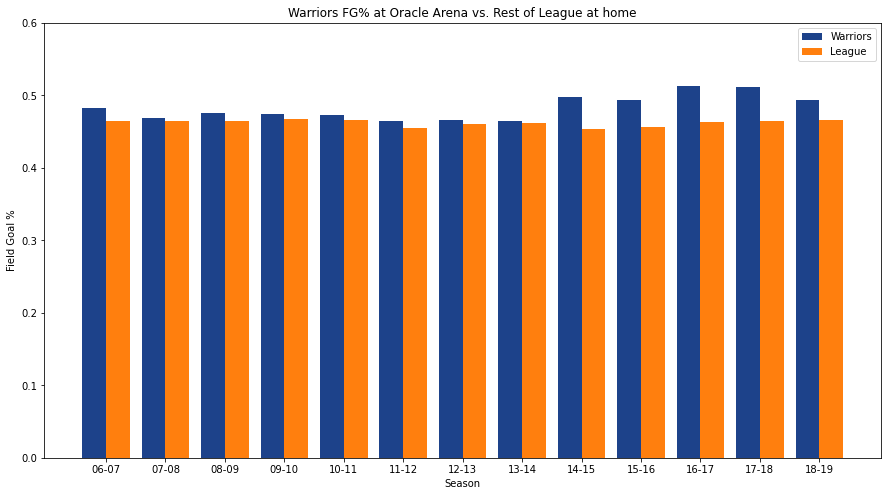

In [9]:
plt.figure(figsize=(15,8))


bar_width = 0.4
x_axis = np.arange(len(seasons))

plt.bar(x_axis - (bar_width/2), gsw_fg_avg_home, bar_width, 
        color='#1D428A', label='Warriors')
plt.bar(x_axis + (bar_width/2), league_fg_avg_home, bar_width, 
        color='tab:orange', label='League')
plt.title("Warriors FG% at Oracle Arena vs. Rest of League at home")
plt.xlabel("Season")
plt.xticks(x_axis, seasons)
plt.ylabel("Field Goal %")
plt.ylim(0,0.6)
plt.legend()
#plt.savefig("fgComparison.png")
plt.show()

### 3-PT %

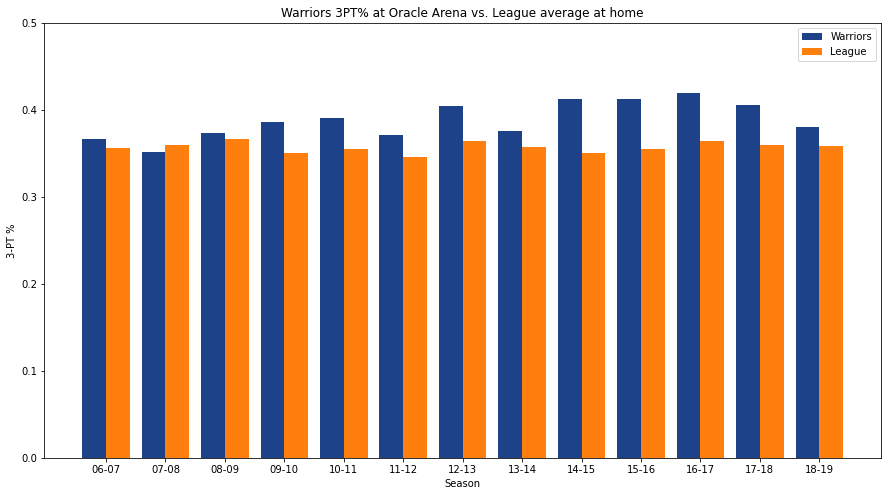

In [10]:
plt.figure(figsize=(15,8))


bar_width = 0.4
x_axis = np.arange(len(seasons))

plt.bar(x_axis - (bar_width/2), gsw_3pt_avg_home, bar_width, 
        color='#1D428A', label='Warriors')
plt.bar(x_axis + (bar_width/2), league_3pt_avg_home, bar_width, 
        color='tab:orange', label='League')
plt.title("Warriors 3PT% at Oracle Arena vs. League average at home")
plt.xlabel("Season")
plt.xticks(x_axis, seasons)
plt.ylabel("3-PT %")
plt.ylim(0,0.5)
plt.legend()
#plt.savefig("fg3Comparison.png")
plt.show()

### Wins

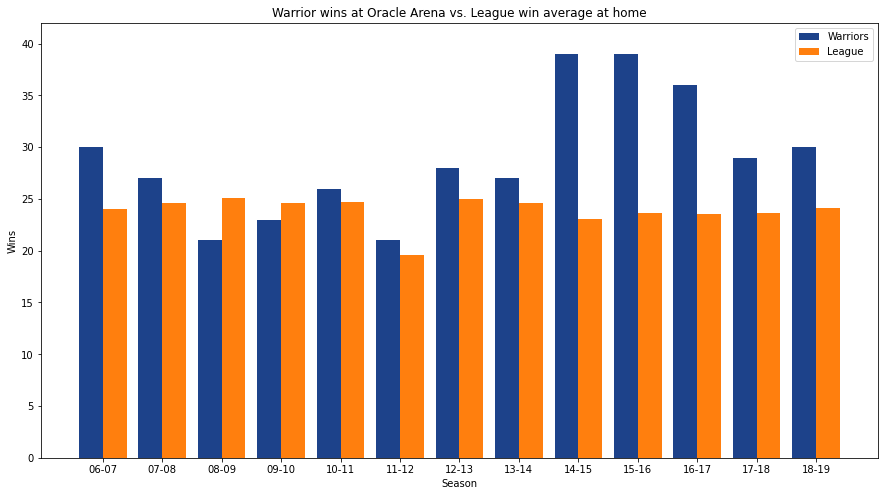

In [11]:
plt.figure(figsize=(15,8))


bar_width = 0.4
x_axis = np.arange(len(seasons))

plt.bar(x_axis - (bar_width/2), gsw_wins_home, bar_width, 
        color='#1D428A', label='Warriors')
plt.bar(x_axis + (bar_width/2), league_wins_avg_home, bar_width, 
        color='tab:orange', label='League')
plt.title("Warrior wins at Oracle Arena vs. League win average at home")
plt.xlabel("Season")
plt.xticks(x_axis, seasons)
plt.ylabel("Wins")
plt.ylim(0,42)
plt.legend()
#plt.savefig("winsComparison.png")
plt.show()